Dosya yüklenmek için

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/heart_disease_classification/heart.csv'
df = pd.read_csv(path)
print("Veri başarıyla yüklendi ✅")
df.head()


Veri başarıyla yüklendi ✅


,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Verilerin Kategorik mi Sayısal mı olduğunu anlamak

In [ ]:
categorical_cols = []
numeric_cols = []

for col in df.columns:
    unique_vals = df[col].nunique()
    dtype = df[col].dtype

    if dtype == 'object' or unique_vals < 10:
        categorical_cols.append(col)
    else:
        numeric_cols.append(col)

print("🔢 Sayısal Değişkenler:\n", numeric_cols)
print("\n🏷️  Kategorik Değişkenler:\n", categorical_cols)

🔢 Sayısal Değişkenler:
 ['age', 'resting_bp', 'cholestoral', 'max_hr', 'oldpeak']

🏷️  Kategorik Değişkenler:
 ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'restecg', 'exang', 'slope', 'num_major_vessels', 'thal', 'target']


🧮 Bu yöntem çok zekice çalışır:

“Az sayıda farklı değer” (örneğin 0/1, 0–3, 1–4) varsa kategorik

“Çok farklı değer” (örneğin yaş, kolesterol) varsa sayısal

Bir veri setinde hem kategorik hem sayısal değişkenler varsa, bu veri seti “karma tipte (mixed-type dataset)” veya “heterojen veri seti” olarak adlandırılır.



Eksik Veri Analizi Adımı
Eğer çıktı tamamen sıfırsa veri temizdir

In [ ]:
# Eksik veri kontrolü
df.isnull().sum()

,0
age,0
sex,0
chest_pain_type,0
resting_bp,0
cholestoral,0
fasting_blood_sugar,0
restecg,0
max_hr,0
exang,0
oldpeak,0


🔍 3️⃣ Eksik Verilerle Ne Yapabiliriz?
🧩 a) Az sayıda eksik varsa:

👉 Ortalama (mean) veya medyan (median) ile doldurabiliriz.

df['chol'].fillna(df['chol'].median(), inplace=True)

🧩 b) Kategorik sütunlarda eksik varsa:

👉 En çok görülen değer (mod) ile doldurulur.

df['thal'].fillna(df['thal'].mode()[0], inplace=True)

🧩 c) Çok fazla eksik varsa:

👉 O sütunu veya satırı silebiliriz.

df.dropna(inplace=True)


Ama dikkat: Çok fazla veri kaybı olmaması gerekir. (Genelde %5–10 eksik toleranslıdır.)

Eksik veri görselleştirme

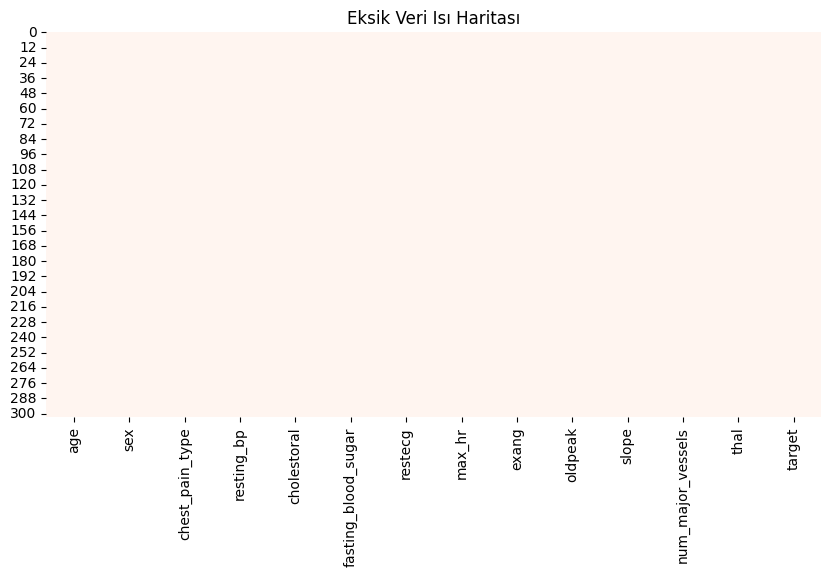

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Eksik Veri Isı Haritası")
plt.show()


💡 İpucu:

Heart Disease dataset genellikle eksiksizdir, ama bazen “ca” ve “thal” sütunlarında ? karakteriyle eksik veri gelebilir.

In [ ]:
import numpy as np

df.replace('?', np.nan, inplace=True)
df.isnull().sum()

,0
age,0
sex,0
chest_pain_type,0
resting_bp,0
cholestoral,0
fasting_blood_sugar,0
restecg,0
max_hr,0
exang,0
oldpeak,0


| Adım | Ne Yapıyoruz                              | Neden                          |
| ---- | ----------------------------------------- | ------------------------------ |
| 1    | `df.isnull().sum()`                       | Eksik veri var mı görmek       |
| 2    | Gerekirse `replace('?', np.nan)`          | Gizli eksikleri görünür yapmak |
| 3    | Doldurma (`fillna`) veya silme (`dropna`) | Veri bütünlüğünü sağlamak      |
| 4    | Görselleştirme (`sns.heatmap`)            | Nerede eksik olduğunu görmek   |


Sıradaki Adım: Aykırı Değer (Outlier) Analizi ve Gerekirse Temizleme
🧩 Neden Bu Adım Önemli?

Eksik veriler “boşluk” bırakırsa,
aykırı değerler (outlier) verinin içine gizlenmiş “uç değerlerdir”.
Bunlar ortalamayı, varyansı ve modelin öğrenmesini yanlış yöne çekebilir.

Örneğin:

Bir kişinin kolesterol değeri 1000 çıkmışsa (normalde 100–600 arası)

Ya da yaş 250 görünüyorsa
➡️ Bu aykırı (uç) değerdir.

🧠 1️⃣ Aykırı Değer Nedir?

Aykırı değer, bir özelliğin genel dağılımından aşırı uzak olan gözlemdir.

Bu durumlar genellikle:

Ölçüm hatası,

Veri giriş hatası,

Farklı bir örneklemden gelen değerler nedeniyle oluşur.

Outlier tespiti analizi adımı sadece sayısal (numerical) değişkenleri kapsıyor.
Aykırılık, istatistiksel olarak ortalama, medyan, standart sapma gibi kavramlara göre tanımlanır.

Bu kavramlar sadece sayısal verilerde anlamlıdır.

Kategorisel verilerde teknik olarak “aykırı değer” kavramı yoktur, ama anlamsal dengesizlik olabilir:thal sütununda değer dağılımı: 3: 290 kez, 7: 10 kez, 9: 1 kez
burada 9 değeri seyrek göründüğü için “rare category (nadir kategori)” denir,
ama bu istatistiksel anlamda outlier değil, dengesiz kategoridir.

Boxplot ile outlier tespiti
1️⃣ Genel Görünüm:

Grafikteki her dikdörtgen kutu bir sayısal sütunu temsil ediyor:

Kutunun ortasındaki yeşil çizgi → medyan

Kutunun kutu sınırları → 1. ve 3. çeyrek değerleri (Q1–Q3)

Kutunun dışındaki daireler → aykırı (outlier) değerler

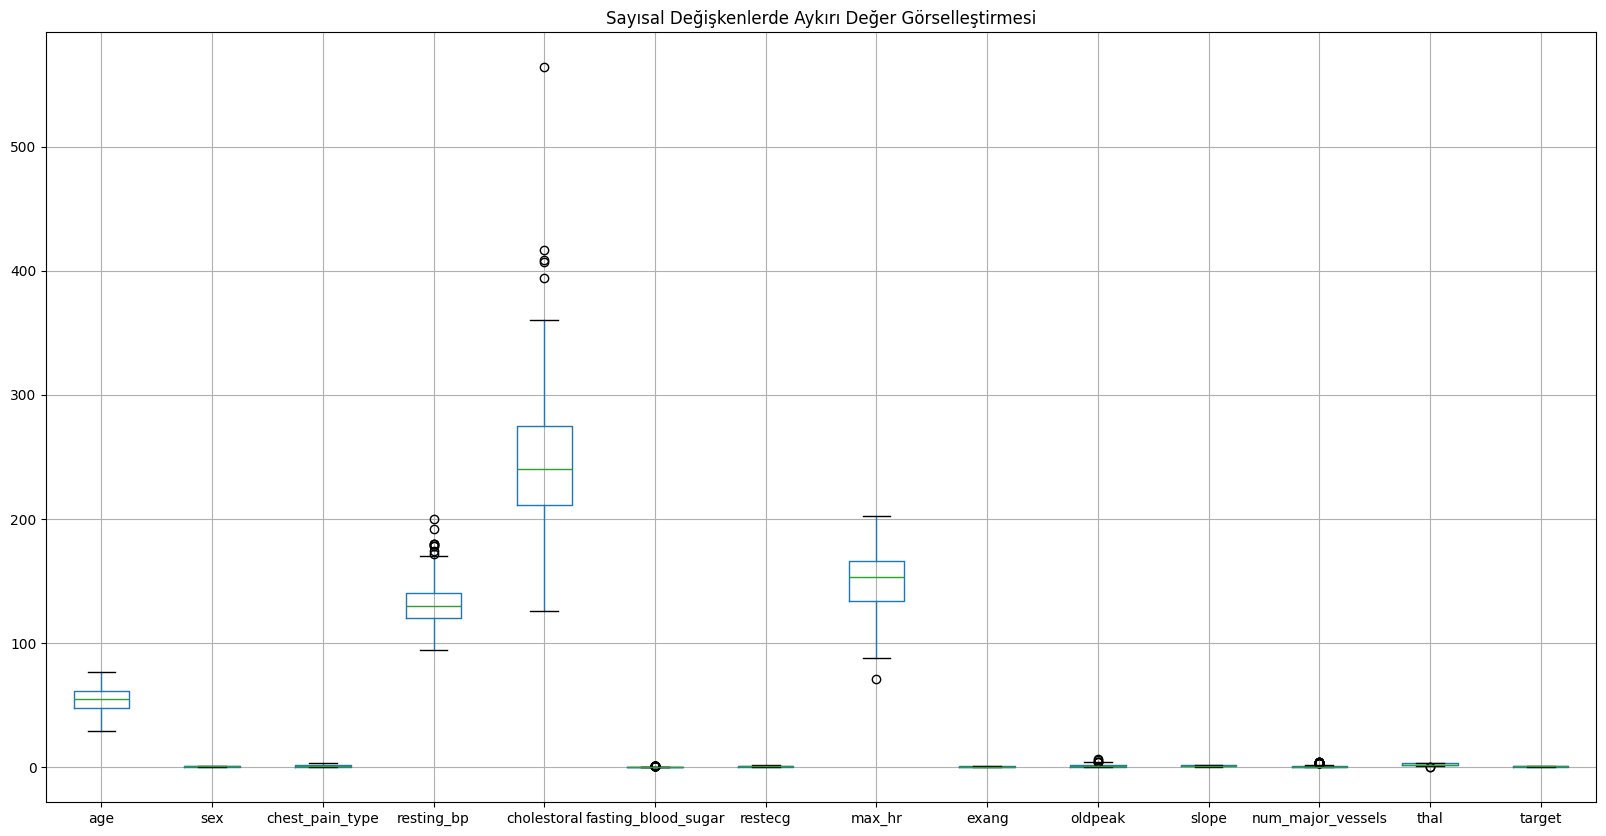

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(20,10))
df.boxplot(column=numeric_cols, figsize=(20,10))
plt.title("Sayısal Değişkenlerde Aykırı Değer Görselleştirmesi")
plt.show()

IQR yöntemi ile sayısal kolonlarda aykırı değerleri istatistiksel olarak sayacağız.

In [ ]:
numeric_cols = ['age', 'resting_bp', 'cholestoral', 'max_hr', 'oldpeak']

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print(outliers)


age            0
resting_bp     9
cholestoral    5
max_hr         1
oldpeak        5
dtype: int64


Aykırı değer çok fazla mı, anlamlı mı, hatalı mı?

📊 a) Eğer sayısı azsa (bizdeki gibi):

Toplam veri 300+ satır, aykırı değer sayısı 20 civarı → çok az!
📍 Bu durumda silmek veya sınırlamak (winsorize) ikisi de kabul edilebilir.

📊 b) Eğer bu değerler “ölçüm hatası” değilse:

Örneğin kolesterol 520 çıkmış bir hasta olabilir. Bu tıbbi olarak “gerçek aykırı değer”dir.
O zaman tutmamız gerekir, çünkü modelin “riskli bireyleri” tanıması için bu bilgiyi öğrenmesi gerekir.

Pratik Yaklaşım — Hafif Düzeltme (Capping)

Tamamen silmek yerine “üst sınırda kırpma (cap)” işlemi yapabiliriz.
Bu, veri dengesini korur ama uç etkileri azaltır.

In [ ]:
import numpy as np

for col in ['resting_bp', 'cholestoral', 'oldpeak']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    #aşağısı capping aşaması
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)


Bu kod:

resting_bp, cholestoral, oldpeak sütunlarındaki çok uç değerleri sınırlayacak,

ama hiçbir satırı silmeyecek.
Son Kontrol (Capping sonrası) ıqr tekrar hesaplanmalı

İşlemden sonra tekrar kontrol et:

In [ ]:
Q1_new = df[numeric_cols].quantile(0.25)
Q3_new = df[numeric_cols].quantile(0.75)
IQR_new = Q3_new - Q1_new

outliers_after_capping = ((df[numeric_cols] < (Q1_new - 1.5 * IQR_new)) |
                          (df[numeric_cols] > (Q3_new + 1.5 * IQR_new))).sum()

print(outliers_after_capping)



age            0
resting_bp     0
cholestoral    0
max_hr         1
oldpeak        0
dtype: int64


🧠 2️⃣ max_hr’deki 1 adet aykırı ne demek?

Bu durum genelde şu iki ihtimalden biridir:

Doğal varyasyon:
Maksimum kalp atımı 200–210 civarı olabilir → özellikle genç bireylerde bu normaldir.

Tek ölçüm hatası:
Eğer değer 250+ gibi çok ekstrem bir sayıysa → onu sınırlamak mantıklı olur.

İki durumda da veri setini bozmadan çözüm basit 👇

In [ ]:
Q1 = df['max_hr'].quantile(0.25)
Q3 = df['max_hr'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df['max_hr'] = np.clip(df['max_hr'], lower, upper)


tekrar kontrol

In [ ]:
from scipy import stats
import numpy as np

Q1_new = df[numeric_cols].quantile(0.25)
Q3_new = df[numeric_cols].quantile(0.75)
IQR_new = Q3_new - Q1_new

outliers_after_final_capping = ((df[numeric_cols] < (Q1_new - 1.5 * IQR_new)) |
                                (df[numeric_cols] > (Q3_new + 1.5 * IQR_new))).sum()
print(outliers_after_final_capping)


age            0
resting_bp     0
cholestoral    0
max_hr         0
oldpeak        0
dtype: int64


🏷️ Kategorik Değişkenlerin Kodlanması (Encoding)

adımına geçtik 🎯

🎯 1️⃣ Neden Encoding Yapıyoruz?

Makine öğrenmesi modelleri (özellikle scikit-learn’deki modeller)
metin veya etiket türündeki kategorik verilerle işlem yapamaz.

Örneğin:

sex = ["Male", "Female"]
thal = ["normal", "fixed_defect", "reversible_defect"]


bunlar sayısal hale getirilmeden model “bunlar arasında matematiksel ilişki kuramaz.”

O yüzden encoding ile kategorik değerleri modele uygun hale getiriyoruz.

| Yöntem                                 | Kullanım Alanı                     | Örnek                            |
| -------------------------------------- | ---------------------------------- | -------------------------------- |
| **Label Encoding**                     | Sıralı (ordinal) kategoriler       | “Low=0, Medium=1, High=2”        |
| **One-Hot Encoding**                   | Sırasız (nominal) kategoriler      | “Male → [1,0]”, “Female → [0,1]” |
| **Binary / Target / Ordinal Encoding** | (İleri düzey, genelde kullanılmaz) | —                                |


| Sütun                         | Açıklama       | Türü                 | Encoding Türü                |
| ----------------------------- | -------------- | -------------------- | ---------------------------- |
| **sex**                       | Cinsiyet (0,1) | Binary               | Label (direkt bırakılabilir) |
| **chest_pain_type (cp)**      | 0–3            | Nominal              | One-Hot                      |
| **fasting_blood_sugar (fbs)** | 0–1            | Binary               | Label                        |
| **restecg**                   | 0–2            | Nominal              | One-Hot                      |
| **exang**                     | 0–1            | Binary               | Label                        |
| **slope**                     | 0–2            | Ordinal              | Label                        |
| **num_major_vessels (ca)**    | 0–4            | Ordinal              | Label                        |
| **thal**                      | 0–3            | Nominal              | One-Hot                      |
| **target**                    | Hedef (0–1)    | Label (ayrı tutulur) |                              |


| Tür         | Kategori Sayısı | Sıra Var mı? | Encoding Türü        | Örnek                 |
| ----------- | --------------- | ------------ | -------------------- | --------------------- |
| **Binary**  | 2               | ❌ Hayır      | Label / Direkt bırak | sex (0–1)             |
| **Nominal** | >2              | ❌ Hayır      | One-Hot              | chest_pain_type (0–3) |
| **Ordinal** | >2              | ✅ Evet       | Label                | slope (0–2), ca (0–4) |


Kolonların ayırımı

In [ ]:
categorical_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar',
                    'restecg', 'exang', 'slope', 'num_major_vessels', 'thal']
numeric_cols = ['age', 'resting_bp', 'cholestoral', 'max_hr', 'oldpeak']
target_col = 'target'


One-hot encoding işlemi (nominal veriler için)

In [ ]:
import pandas as pd

df_encoded = pd.get_dummies(df,
                            columns=['chest_pain_type', 'restecg', 'thal'],
                            drop_first=True)

df_encoded.head()


,age,sex,resting_bp,cholestoral,fasting_blood_sugar,max_hr,exang,oldpeak,slope,num_major_vessels,target,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,63,1,145,233.0,1,150.0,0,2.3,0,0,1,False,False,True,False,False,True,False,False
1,37,1,130,250.0,0,187.0,0,3.5,0,0,1,False,True,False,True,False,False,True,False
2,41,0,130,204.0,0,172.0,0,1.4,2,0,1,True,False,False,False,False,False,True,False
3,56,1,120,236.0,0,178.0,0,0.8,2,0,1,True,False,False,True,False,False,True,False
4,57,0,120,354.0,0,163.0,1,0.6,2,0,1,False,False,False,True,False,False,True,False


Label Encoding (Basit 0–1 Kodlama)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['sex', 'fasting_blood_sugar', 'exang', 'slope', 'num_major_vessels']
le = LabelEncoder()

for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [ ]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   resting_bp           303 non-null    int64  
 3   cholestoral          303 non-null    float64
 4   fasting_blood_sugar  303 non-null    int64  
 5   max_hr               303 non-null    float64
 6   exang                303 non-null    int64  
 7   oldpeak              303 non-null    float64
 8   slope                303 non-null    int64  
 9   num_major_vessels    303 non-null    int64  
 10  target               303 non-null    int64  
 11  chest_pain_type_1    303 non-null    bool   
 12  chest_pain_type_2    303 non-null    bool   
 13  chest_pain_type_3    303 non-null    bool   
 14  restecg_1            303 non-null    bool   
 15  restecg_2            303 non-null    boo

Bu çok iyi çünkü:

Artık object tipi (metin) hiç yok ✅

Tüm sütunlar makine öğrenmesi modeline doğrudan girebilir ✅

bool sütunlar da sayısal olarak (0 veya 1) işlem görür, dolayısıyla ek dönüşüme gerek yok ✅

Encoding Sonrası Değişkenlerin Dağılımı

Sayısal (Numerical):
age, resting_bp, cholestoral, max_hr, oldpeak

Kategorik (Ordinal/Binary):
sex, fasting_blood_sugar, exang, slope, num_major_vessels

One-Hot (Nominal):
chest_pain_type_*, restecg_*, thal_*

Target (Label):
target

| Adım                         | Durum                          |
| ---------------------------- | ------------------------------ |
| Eksik veri temizliği         | ✔️ Tamam                       |
| Aykırı değer düzenleme       | ✔️ Tamam                       |
| Encoding                     | ✔️ Tamam                       |
| Sadece sayısal veri kaldı    | ✔️ Evet                        |
| Modellemeye hazır hale gelme | 🔄 Sırada: ölçekleme (scaling) |


Sıradaki Adım — Sayısal Verilerin Ölçeklenmesi (Scaling)

Çünkü şu an:

Bazı sütunlar (örneğin cholestoral, oldpeak) çok farklı ölçeklerde (0–500, 0–6 gibi),

Bazıları ise küçük değerlerde (age, max_hr vs).

Bu durum modelin öğrenmesini zorlaştırır, özellikle gradient tabanlı algoritmalarda (Logistic Regression, SVM, KNN).

SAYISAL VERİLERİN ÖLÇEKLENMESİ (FEATURE SCALING)
🧠 1️⃣ Neden Ölçekleme Yapıyoruz?

Bazı sütunlar çok büyük sayılara sahipken (örnek: cholestoral ≈ 500),
bazıları çok küçük (örnek: oldpeak ≈ 0–6).

Bu durumda bazı modeller (özellikle mesafe temelli ve gradyan tabanlı modeller):

büyük ölçekli sütunlara daha fazla önem verir,

küçük ölçeklileri ihmal eder.

💡 Amaç:
Tüm sayısal değişkenleri benzer aralıklara getirip
modelin her özelliği eşit düzeyde “hissetmesini” sağlamak

Hangi modellerde gereklidir ?
| Ölçekleme Gereklidir ✅       | Ölçekleme Gerekmez ❌ |
| ---------------------------- | -------------------- |
| Logistic Regression          | Decision Tree        |
| KNN (K-en yakın komşu)       | Random Forest        |
| SVM (Support Vector Machine) | XGBoost              |
| PCA, Neural Network          | Gradient Boosting    |


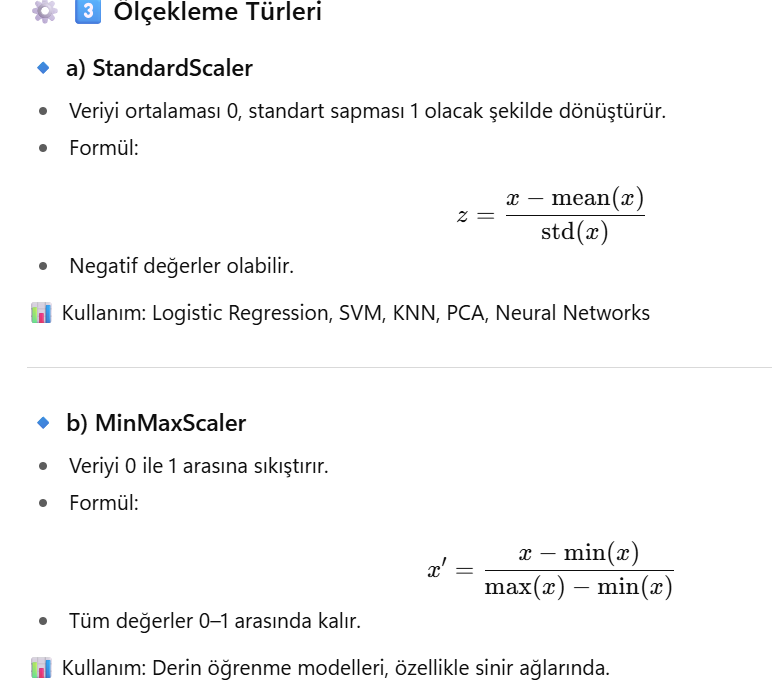

Sadece sayısal (continuous) sütunları ölçekliyoruz:
numeric_cols = ['age', 'resting_bp', 'cholestoral', 'max_hr', 'oldpeak']
çıkan sonuç z-skoru tablosudur.

In [ ]:
numeric_cols = ['age', 'resting_bp', 'cholestoral', 'max_hr', 'oldpeak']
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

df_scaled = df_encoded.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

df_scaled[numeric_cols].head()


,age,resting_bp,cholestoral,max_hr,oldpeak
0,0.952197,0.828728,-0.255601,0.013543,1.150938
1,-1.915313,-0.077351,0.102487,1.641748,2.233684
2,-1.474158,-0.077351,-0.866457,0.981665,0.338879
3,0.180175,-0.681403,-0.192409,1.245698,-0.202494
4,0.290464,-0.681403,2.293143,0.585615,-0.382951


| Değer Aralığı        | Anlamı                                                         |
| -------------------- | -------------------------------------------------------------- |
| **0**                | Değer tam olarak sütun ortalamasında.                          |
| **Pozitif (+)**      | Değer ortalamanın **üstünde**.                                 |
| **Negatif (–)**      | Değer ortalamanın **altında**.                                 |
| **+1 / –1 civarı**   | Ortalama etrafında normal varyasyon.                           |
| **+2 veya –2 üzeri** | Ortalama dışına çıkmaya başlayan gözlemler (aykırı olasılığı). |

| age        | resting_bp | cholestoral | max_hr | oldpeak | Açıklama                                                                                                |
| ---------- | ---------- | ----------- | ------ | ------- | ------------------------------------------------------------------------------------------------------- |
| **0.952**  | 0.828      | -0.255      | 0.013  | 1.150   | Bu kişi **yaş ve tansiyonda ortalamanın üstünde**, kolesterol normal, oldpeak biraz yüksek.             |
| **-1.915** | -0.077     | 0.102       | 1.641  | 2.233   | Bu kişi **çok genç (yaş ortalamanın çok altında)**, kalp atım hızı ve oldpeak değerleri oldukça yüksek. |
| **-1.474** | -0.077     | -0.866      | 0.981  | 0.338   | Genç, kolesterol düşük, kalp atımı yüksek ama oldpeak normal.                                           |
| **0.180**  | -0.681     | -0.192      | 1.245  | -0.202  | Orta yaşlı, tansiyonu düşük, kalp atımı biraz yüksek, oldpeak düşük.                                    |
| **0.290**  | -0.681     | 2.293       | 0.585  | -0.382  | Orta yaşlı ama **kolesterol çok yüksek** (2.29 → ortalamanın 2.3 std üstü).                             |


Z-score’lar sayesinde:

Modelin parametre ağırlıkları daha anlamlı hale gelir.

Özelliklerin önemi karşılaştırılabilir olur.

Özellikle gradient descent kullanan algoritmalarda (Logistic Regression, Neural Network) daha hızlı yakınsama sağlanır.

(Alternatif) MinMaxScaler Uygulaması
İstersen tüm sayısal sütunları 0–1 aralığına da çekebilirsin:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
df_scaled_minmax = df_encoded.copy()
df_scaled_minmax[numeric_cols] = minmax_scaler.fit_transform(df_encoded[numeric_cols])

df_scaled_minmax[numeric_cols].head()

,age,resting_bp,cholestoral,max_hr,oldpeak
0,0.708333,0.671053,0.438974,0.556503,0.575
1,0.166667,0.473684,0.508718,0.872068,0.875
2,0.250000,0.473684,0.320000,0.744136,0.350
3,0.562500,0.342105,0.451282,0.795309,0.200
4,0.583333,0.342105,0.935385,0.667377,0.150


| Özellik                          | **StandardScaler**                                              | **MinMaxScaler**                                     |
| -------------------------------- | --------------------------------------------------------------- | ---------------------------------------------------- |
| **Amaç**                         | Değerleri ortalama = 0, std = 1 olacak şekilde standardize eder | Değerleri 0–1 aralığına sıkıştırır                   |
| **Formül**                       | (x - μ) / σ                                                     | (x - min(x)) / (max(x) - min(x))                     |
| **Dağılım Etkisi**               | Negatif değerler olabilir, dağılımı korur                       | Tüm değerleri pozitif hale getirir                   |
| **Aykırılardan Etkilenme**       | Orta düzey                                                      | Çok yüksek (outlier varsa etkilenir)                 |
| **Kullanım Alanı**               | Gaussian (normal) dağılımlı veriler                             | Normalize edilmesi gereken değerler, Neural Networks |
| **Çıktı Aralığı**                | -3 ile +3 arası genelde                                         | 0 ile 1 arası                                        |
| **Yaygın Kullanıldığı Modeller** | Logistic Regression, SVM, PCA, KNN                              | Neural Network, CNN, LSTM                            |


Dağılım normal (bell-curve) ise → StandardScaler()

Dağılım eğri veya pozitif sınırlı (0–∞) ise → MinMaxScaler()

Dağılımı nasıl anlarsın ?

1️⃣ Görsel Yöntemler — En Etkili Yol
🔹 a) Histogram (En Basit Yöntem)

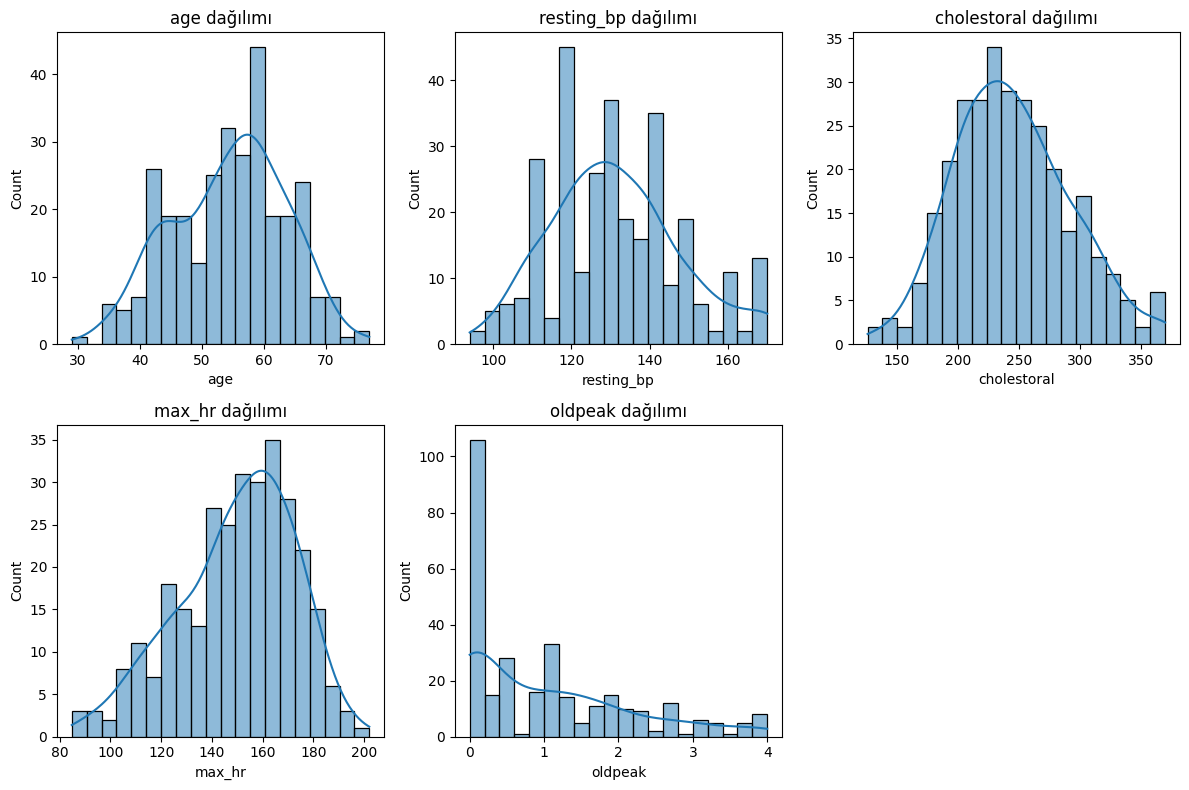

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['age', 'resting_bp', 'cholestoral', 'max_hr', 'oldpeak']

plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2,3,i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"{col} dağılımı")
plt.tight_layout()
plt.show()


| Şekil                               | Anlam                                                         |
| ----------------------------------- | ------------------------------------------------------------- |
| Çan eğrisi gibi ortada toplanmış    | ✅ Normal dağılım (StandardScaler uygun)                       |
| Sağ kuyruğu uzun (eğri sağa kaymış) | 🔸 Pozitif çarpık (MinMaxScaler daha uygun)                   |
| Sol kuyruğu uzun (eğri sola kaymış) | 🔸 Negatif çarpık (MinMaxScaler veya log dönüşüm gerekebilir) |


Boxplot (Dağılım + Aykırılık)

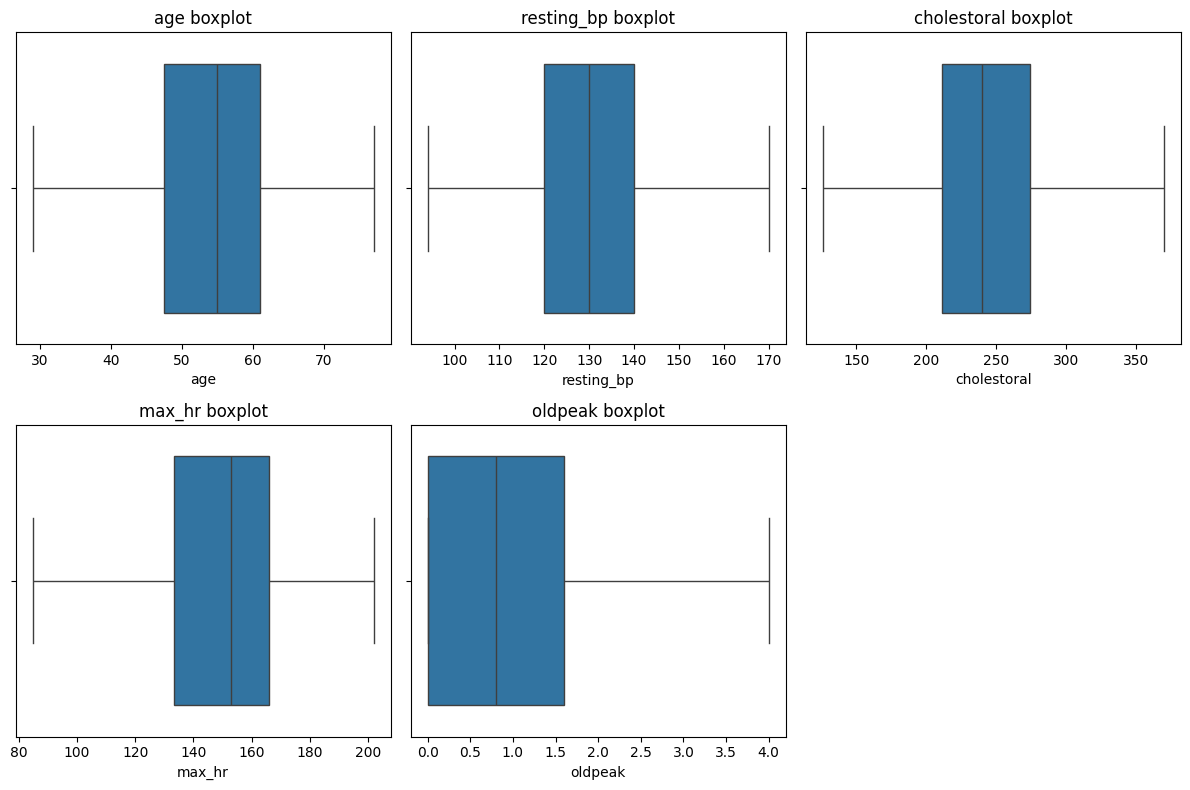

In [ ]:
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2,3,i)
    sns.boxplot(x=df[col])
    plt.title(f"{col} boxplot")
plt.tight_layout()
plt.show()


Boxplot, değerlerin medyan ve uç noktalarına bakarak
dağılımın simetrik olup olmadığını gösterir.

Q-Q Plot (Gerçek Normal Testi)

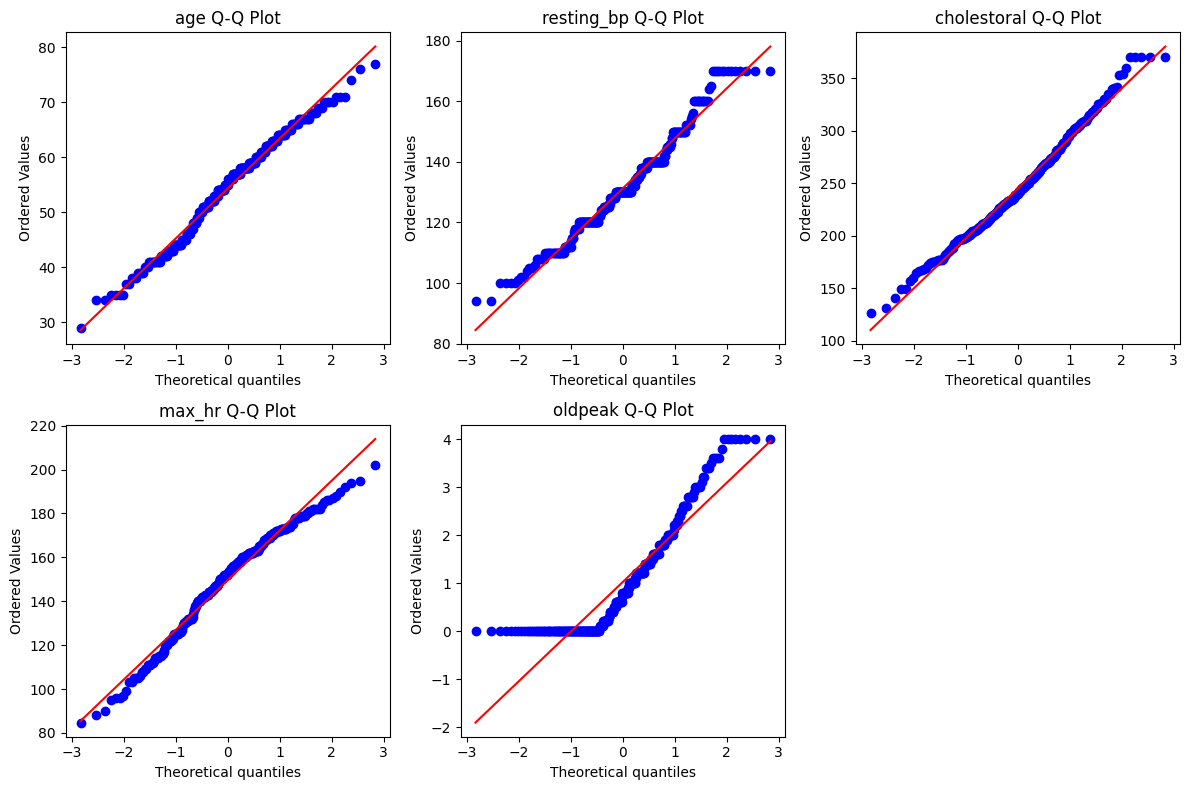

In [ ]:
import scipy.stats as stats

plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2,3,i)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"{col} Q-Q Plot")
plt.tight_layout()
plt.show()


Q-Q Plot’ta noktalar düz çizgiye yakınsa → normal dağılım var.
Eğer kavisli veya uçlarda sapma varsa → normalden sapma var.

 Çarpıklık (Skewness) ve Basıklık (Kurtosis)

In [ ]:
df[numeric_cols].agg(['skew', 'kurtosis'])


,age,resting_bp,cholestoral,max_hr,oldpeak
skew,-0.202463,0.386367,0.333267,-0.493392,0.997885
kurtosis,-0.542167,-0.154389,-0.110820,-0.240841,0.123227


|Skew| < 0.5 → Yaklaşık normal (StandardScaler)

|Skew| > 1 → Eğik (MinMaxScaler daha uygun)

Bazı değişkenler normal dağılıma yakındır → StandardScaler uygun olur.
Bazıları (örneğin senin örneğinde oldpeak) pozitif, sıfırdan büyük ve sağa çarpık dağılım gösterir → MinMaxScaler daha uygun olur.

💡 Amaç:
Her sütun kendi dağılımına en uygun şekilde dönüştürülmeli.
Yani “tek tip scaler” değil, “kolon bazlı scaler” seçimi daha akıllıcadır.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Kopya DataFrame
df_scaled = df_encoded.copy()

# 1️⃣ StandardScaler: normal dağılımlı kolonlar
standard_cols = ['age', 'resting_bp', 'cholestoral', 'max_hr']
scaler_std = StandardScaler()
df_scaled[standard_cols] = scaler_std.fit_transform(df_scaled[standard_cols])

# 2️⃣ MinMaxScaler: çarpık dağılımlı kolon (örnek: oldpeak)
minmax_cols = ['oldpeak']
scaler_minmax = MinMaxScaler()
df_scaled[minmax_cols] = scaler_minmax.fit_transform(df_scaled[minmax_cols])

# Sonuç kontrolü
df_scaled.head()


,age,sex,resting_bp,cholestoral,fasting_blood_sugar,max_hr,exang,oldpeak,slope,num_major_vessels,target,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,0.952197,1,0.828728,-0.255601,1,0.013543,0,0.575,0,0,1,False,False,True,False,False,True,False,False
1,-1.915313,1,-0.077351,0.102487,0,1.641748,0,0.875,0,0,1,False,True,False,True,False,False,True,False
2,-1.474158,0,-0.077351,-0.866457,0,0.981665,0,0.350,2,0,1,True,False,False,False,False,False,True,False
3,0.180175,1,-0.681403,-0.192409,0,1.245698,0,0.200,2,0,1,True,False,False,True,False,False,True,False
4,0.290464,0,-0.681403,2.293143,0,0.585615,1,0.150,2,0,1,False,False,False,True,False,False,True,False


In [ ]:
df_scaled[standard_cols].describe()
df_scaled[minmax_cols].describe()


,oldpeak
count,303.000000
mean,0.256106
std,0.277532
min,0.000000
25%,0.000000
50%,0.200000
75%,0.400000
max,1.000000


StandardScaler sütunlarının ortalaması ≈ 0, std ≈ 1

MinMaxScaler sütunlarının min ≈ 0, max ≈ 1

Alternatif Profesyonel Yöntem (ColumnTransformer)
Scikit-learn pipeline’ları için sütun bazlı scaler tanımlaman gerekiyorsa (örneğin modelleme öncesinde), şöyle yaparsın:

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('std_scaler', StandardScaler(), ['age', 'resting_bp', 'cholestoral', 'max_hr']),
        ('minmax_scaler', MinMaxScaler(), ['oldpeak'])
    ],
    remainder='passthrough'  # diğer kolonlara dokunma
)


Hangi Modelde Hangisini Kullanmalıyım?
| Model                                                           | Hangi Scaler Uygun | Neden                                                                     |
| --------------------------------------------------------------- | ------------------ | ------------------------------------------------------------------------- |
| **Linear Regression / Logistic Regression**                     | `StandardScaler`   | Gradyan tabanlı — ortalama 0, std 1 hızlı yakınsama sağlar                |
| **SVM (Support Vector Machine)**                                | `StandardScaler`   | Mesafe ölçümlerini standardize eder, margin hesaplaması kolaylaşır        |
| **KNN (K-Nearest Neighbors)**                                   | `MinMaxScaler`     | Mesafeye duyarlı, 0–1 aralığı daha dengeli sonuç verir                    |
| **Neural Network (MLP, CNN, LSTM)**                             | `MinMaxScaler`     | Aktivasyon fonksiyonları (sigmoid, tanh) 0–1 veya -1–1 aralığında çalışır |
| **PCA (Principal Component Analysis)**                          | `StandardScaler`   | Kovaryans matrisini optimize eder                                         |
| **Tree-Based Modeller (Decision Tree, Random Forest, XGBoost)** | ❌ Gerekmez         | Ağaç tabanlı modeller ölçekten etkilenmez                                 |


Model dağılıma göre karar verilir. Dağılım normal ise standartScaler kullanılır bu da SVM,Linear Regression vb. dir.

Ancak dağılım normal değilse MinMaxScaler kullanılır bu da derin öğrenme modeline girer. Derin öğrenme modeli pozitif değerlere bakar.
CNN vb.

MODEL EĞİTİMİ AŞAMASI – Logistic Regression ile Başlangıç

Modelimizin temel görevi:

Bir kişinin kalp hastalığı (heart disease) var mı yok mu (0/1) tahmin etmek.

Yani bu bir ikili sınıflandırma (binary classification) problemidir.
Dolayısıyla ilk model olarak Logistic Regression mükemmel bir başlangıçtır.

Train/Test Ayrımı (train_test_split)

Modeli eğitmeden önce, veriyi ikiye böleriz:

Eğitim (Train) → %80 (modeli öğrenmek için)

Test (Test) → %20 (öğrendiklerini sınamak için)

In [ ]:
from sklearn.model_selection import train_test_split

# 1️⃣ Hedef ve özellikleri ayıralım
X = df_scaled.drop('target', axis=1)
y = df_scaled['target']

# 2️⃣ Veriyi bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Eğitim veri boyutu:", X_train.shape)
print("Test veri boyutu:", X_test.shape)

#stratify=y → hedef değişkenin sınıf oranlarını korur (örneğin 0 ve 1 dengesi bozulmaz).

Eğitim veri boyutu: (242, 18)
Test veri boyutu: (61, 18)


random_State neden 42 ?
🎯 1️⃣ Ne Anlama Geliyor?

Birçok makine öğrenmesi fonksiyonu (örneğin train_test_split, LogisticRegression, RandomForest vs.) içinde rastgelelik (randomness) vardır.
Örneğin:

Veriyi %80 train / %20 test olarak bölerken hangi satırlar test’e gidecek?

Modelin ağırlıkları ilk başta rastgele mi başlasın?

Bu rastgelelik nedeniyle her çalıştırmada sonuçlar biraz değişebilir.
İşte random_state bu noktada devreye girer 👇

📌 random_state bir "tohum" (seed) değeridir.

Yani:

"Aynı rastgelelik düzenini her seferinde tekrar et."

🔢 2️⃣ Neden 42?

42 tamamen geleneksel bir sembolik sayıdır 😄
Douglas Adams’ın “The Hitchhiker’s Guide to the Galaxy” kitabında

“Hayatın, evrenin ve her şeyin anlamı = 42”
olarak geçtiği için, veri bilimciler arasında espriyle standart hale gelmiştir.

Yani 42’nin özel matematiksel anlamı yok —
ama herkesin bildiği “evrensel seed” sayısıdır 😄

Logistic Regression Modelini Kurma

In [ ]:
from sklearn.linear_model import LogisticRegression

# Modeli oluştur
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Eğit
log_reg.fit(X_train, y_train)

#max_iter=1000 → modelin tam olarak yakınsamasını garantiler.

LogisticRegression(max_iter=1000, random_state=42)

Tahmin ve Başarı (Accuracy) Hesaplama

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Tahmin et
y_pred = log_reg.predict(X_test)

# Başarı oranı
acc = accuracy_score(y_test, y_pred)
print(f"Doğruluk Oranı (Accuracy): {acc:.3f}")


Doğruluk Oranı (Accuracy): 0.787


Detaylı Performans Raporu

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[20  8]
 [ 5 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



Bu çıktı sana şunları verecek:

Precision (Kesinlik) → Model pozitif dediğinde ne kadar doğru?

Recall (Duyarlılık) → Gerçek pozitiflerin ne kadarını buluyor?

F1-score → Precision ve Recall’un dengesi

Accuracy → Genel doğruluk

Confusion Matrix Görselleştirme (isteğe bağlı)

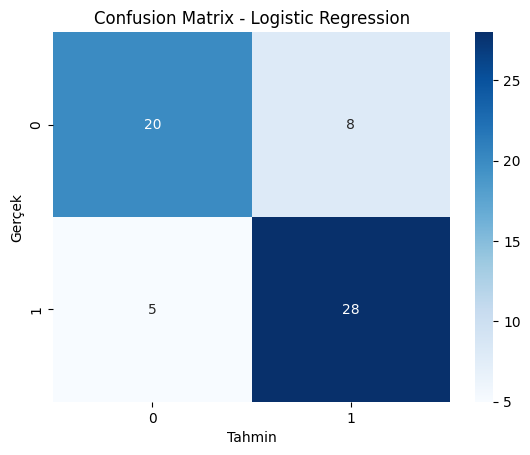

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


| Kategori                | Açıklama                                                                      |
| ----------------------- | ----------------------------------------------------------------------------- |
| 🔹 Veri                 | Eksik/aykırı değerleri, feature scaling, dengesiz sınıf sorunlarını düzeltmek |
| 🔹 Özellik Mühendisliği | Yeni anlamlı sütunlar oluşturmak (ör. yaş grubu, BMI, risk skoru)             |
| 🔹 Model                | Daha karmaşık, non-linear modelleri denemek                                   |
| 🔹 Hiperparametre Ayarı | Modelin parametrelerini optimize etmek (GridSearchCV)                         |


Ancak gerçek veriler (özellikle tıbbi veriler) genelde doğrusal (lineer) ilişkiler içermez.

Yani model şu anda düz bir karar sınırı çizmeye çalışıyor.
Ama ilişkiler bazen eğrisel, bazen etkileşimlidir.

Şimdi non-linear bir model eğitimi ile devam

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

X = df_scaled.drop('target', axis=1)
y = df_scaled['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


Modeller ve küçük (ama işe yarar) hiperparametre ızgaraları

Ağaç tabanlılar ölçeklemeye ihtiyaç duymaz (zaten hazır verin var, sorun değil).
SVM/KNN ölçekli veriyi sever — bizde zaten var ✅

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models_and_params = {
    "RandomForest": (
        RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced'),
        {
            "n_estimators": [200, 400],
            "max_depth": [None, 5, 10],
            "min_samples_split": [2, 5]
        }
    ),
    "GradientBoosting": (
        GradientBoostingClassifier(random_state=42),
        {
            "n_estimators": [150, 300],
            "learning_rate": [0.05, 0.1],
            "max_depth": [2, 3]
        }
    ),
    "SVC_RBF": (
        SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42),
        {
            "C": [0.5, 1, 2],
            "gamma": ["scale", 0.1, 0.01]
        }
    ),
    "KNN": (
        KNeighborsClassifier(),
        {
            "n_neighbors": [5, 9, 15],
            "weights": ["uniform", "distance"]
        }
    )
}

# (İsteğe bağlı) XGBoost eklemek:
try:
    from xgboost import XGBClassifier
    models_and_params["XGBoost"] = (
        XGBClassifier(
            random_state=42, n_estimators=400, eval_metric='logloss',
            tree_method='hist', n_jobs=-1, subsample=0.9, colsample_bytree=0.9
        ),
        {
            "max_depth": [3, 5],
            "learning_rate": [0.05, 0.1],
            "reg_lambda": [1.0, 2.0]
        }
    )
except Exception as e:
    print("XGBoost yüklenmemiş olabilir, şimdilik atlanıyor:", e)


🧩 2. AŞAMANIN MANTIĞI: “Modelleri ve parametrelerini tanımla”
💡 Basit düşün:

Her modelin “ayar düğmeleri” (parametreleri) vardır.

Örneğin:

RandomForest → kaç tane ağaç kullanılacak (n_estimators)?

SVM → eğri ne kadar bükülebilir (C, gamma)?

KNN → kaç komşu dikkate alınacak (n_neighbors)?

GradientBoosting → her turda ne kadar öğrenilecek (learning_rate)?

Bu ayarları tek tek denemek yerine, biz GridSearchCV aracılığıyla
“bir parametre ızgarası (grid)” oluşturuyoruz.
Yani diyoruz ki:

“Bu model için şu değerleri sırayla dene, en iyi sonucu getir.”

In [ ]:
best_models = {}

for name, (model, params) in models_and_params.items():
    grid = GridSearchCV(
        estimator=model,
        param_grid=params,
        scoring="roc_auc",   # dilersen "f1" ile de deneyebilirsin
        cv=cv,
        n_jobs=-1,
        refit=True
    )
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"{name} | En iyi ROC-AUC (CV): {grid.best_score_:.3f} | En iyi parametreler: {grid.best_params_}")


RandomForest | En iyi ROC-AUC (CV): 0.881 | En iyi parametreler: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 400}
GradientBoosting | En iyi ROC-AUC (CV): 0.864 | En iyi parametreler: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 150}
SVC_RBF | En iyi ROC-AUC (CV): 0.895 | En iyi parametreler: {'C': 2, 'gamma': 0.01}
KNN | En iyi ROC-AUC (CV): 0.878 | En iyi parametreler: {'n_neighbors': 9, 'weights': 'distance'}
XGBoost | En iyi ROC-AUC (CV): 0.874 | En iyi parametreler: {'learning_rate': 0.05, 'max_depth': 5, 'reg_lambda': 2.0}


5) Hangi model daha iyi?

ROC-AUC ve F1 yüksek olanı seç.

Sağlık senaryolarında Recall (hastayı kaçırmamak) kritikse, raporda özellikle Recall’a bak.

Genelde bu veri setinde RandomForest / GradientBoosting / XGBoost / SVC(RBF), Logistic’ten daha iyi skor verir (%82–88 aralığı).

6) Küçük ama etkili ipuçları

class_weight='balanced' (SVC, RF) → sınıf dengesini iyileştirir.

Özellik önemi (RF/XGB) ile gereksiz kolonları çıkarıp tekrar dene.

CV katlarını artırmak (n_splits=10) skoru stabilize eder.

Hızlı “son rötuş”: SVC’de C ve gammayı biraz daha taramak; RF’de max_features=['sqrt','log2'] eklemek.

2️⃣ Ne Anlama Geliyor?

ROC-AUC, modelin “sınıfları ne kadar iyi ayırt ettiğini” ölçer (1.0 = mükemmel).

%89.5 AUC, Logistic Regression’daki 0.78 doğruluğa göre büyük bir sıçrama anlamına geliyor.

En iyi üç aday:

🥇 SVC (RBF kernel) — karmaşık, eğrisel sınırlar yakalıyor

🥈 RandomForest — stabil ve yorumlanabilir

🥉 KNN — basit ama iyi genelleme gösteriyor
En İyi Modeli Test Etme (SVC_RBF)

Aşağıdaki kodu çalıştır 👇
(tahmin ve metrik hesaplaması yapar)

In [ ]:
best_svc = best_models["SVC_RBF"]

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

y_pred = best_svc.predict(X_test)
y_proba = best_svc.predict_proba(X_test)[:, 1]

print("=== TEST SET SONUÇLARI ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"F1-score: {f1_score(y_test, y_pred):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.3f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


=== TEST SET SONUÇLARI ===
Accuracy: 0.787
F1-score: 0.806
ROC-AUC: 0.887

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.79      0.82      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61


Confusion Matrix:
[[21  7]
 [ 6 27]]
